In [3]:
gini_one = 1 - (9/16)**2 - (7/16)**2
gini_two = 1 - (1/5)**2 - (4/5)**2
gini_three = 1 - (2/3)**2 - (1/3)**2
gini_four = 1 - (1/2)**2 - (1/2)**2

In [5]:
print("Gini :" , gini_one)
print("Gini :" , gini_two)
print("Gini :" , gini_three)
print("Gini :" , gini_four)

Gini : 0.4921875
Gini : 0.31999999999999984
Gini : 0.4444444444444445
Gini : 0.5


In [6]:
gini_sum = (5/10)*(gini_two) + (3/10)*(gini_three) + (2/10)*(gini_four)
print("Weighted Average: ", gini_sum)

Weighted Average:  0.3933333333333332


In [23]:
# Question 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
df = pd.read_csv('data/iris.csv')
iris = df
print(df.head())
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["species"]
# 125 training and 25 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25,
 random_state=1, stratify=y)
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


DecisionTreeClassifier()

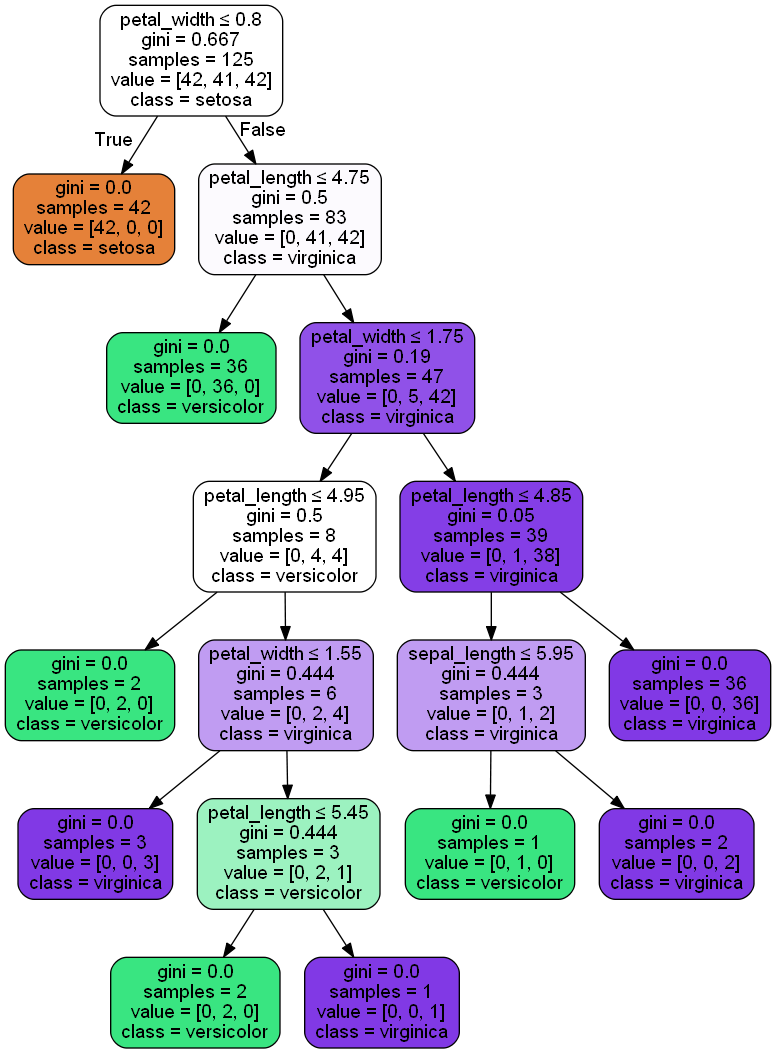

In [31]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True, feature_names = feature_names,
 class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/iris.png')
Image(graph.create_png())

In [26]:
#Predict the response for test dataset
y_hat = tree.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_hat))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)

Accuracy: 0.96
[[8 0 0]
 [0 9 0]
 [0 1 7]]
